In [ ]:
! pip install datasets

In [17]:
from datasets import load_dataset

ds = load_dataset("scikit-learn/iris", split="train")

ds = ds.train_test_split(test_size=0.2, shuffle=True)

ds

DatasetDict({
    train: Dataset({
        features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'],
        num_rows: 120
    })
    test: Dataset({
        features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'],
        num_rows: 30
    })
})

In [80]:
ds = load_dataset("mstz/sonar", split="train")
ds = ds.train_test_split(test_size=0.2, shuffle=True)

In [97]:
list(ds['train'][0].values())[:60]

[0.03629999980330467,
 0.04780000075697899,
 0.02979999966919422,
 0.020999999716877937,
 0.14090000092983246,
 0.1915999948978424,
 0.13490000367164612,
 0.16130000352859497,
 0.17030000686645508,
 0.1444000005722046,
 0.1988999992609024,
 0.21539999544620514,
 0.28630000352859497,
 0.3569999933242798,
 0.39800000190734863,
 0.4359000027179718,
 0.5333999991416931,
 0.6304000020027161,
 0.6995000243186951,
 0.7434999942779541,
 0.8378999829292297,
 0.8640999794006348,
 0.9014000296592712,
 0.9431999921798706,
 0.9535999894142151,
 1.0,
 0.9546999931335449,
 0.9745000004768372,
 0.8962000012397766,
 0.7196000218391418,
 0.5461999773979187,
 0.3156000077724457,
 0.2524999976158142,
 0.19689999520778656,
 0.21889999508857727,
 0.15330000221729279,
 0.07109999656677246,
 0.14980000257492065,
 0.17550000548362732,
 0.22759999334812164,
 0.13220000267028809,
 0.10559999942779541,
 0.1973000019788742,
 0.16920000314712524,
 0.18809999525547028,
 0.1177000030875206,
 0.0778999999165535,
 0.04

In [99]:
X_train = [list(sample.values())[:60] for sample in ds['train']]
X_test = [list(sample.values())[:60] for sample in ds['test']]
print(X_train[0])

[0.03629999980330467, 0.04780000075697899, 0.02979999966919422, 0.020999999716877937, 0.14090000092983246, 0.1915999948978424, 0.13490000367164612, 0.16130000352859497, 0.17030000686645508, 0.1444000005722046, 0.1988999992609024, 0.21539999544620514, 0.28630000352859497, 0.3569999933242798, 0.39800000190734863, 0.4359000027179718, 0.5333999991416931, 0.6304000020027161, 0.6995000243186951, 0.7434999942779541, 0.8378999829292297, 0.8640999794006348, 0.9014000296592712, 0.9431999921798706, 0.9535999894142151, 1.0, 0.9546999931335449, 0.9745000004768372, 0.8962000012397766, 0.7196000218391418, 0.5461999773979187, 0.3156000077724457, 0.2524999976158142, 0.19689999520778656, 0.21889999508857727, 0.15330000221729279, 0.07109999656677246, 0.14980000257492065, 0.17550000548362732, 0.22759999334812164, 0.13220000267028809, 0.10559999942779541, 0.1973000019788742, 0.16920000314712524, 0.18809999525547028, 0.1177000030875206, 0.0778999999165535, 0.0494999997317791, 0.04919999837875366, 0.01940000

In [50]:
print(ds['train'][0])

X_train = [(sample['SepalLengthCm'], sample['SepalWidthCm'], sample['PetalLengthCm'], sample['PetalWidthCm']) for sample in ds['train']]

X_test = [(sample['SepalLengthCm'], sample['SepalWidthCm'], sample['PetalLengthCm'], sample['PetalWidthCm']) for sample in ds['test']]

{'Id': 113, 'SepalLengthCm': 6.8, 'SepalWidthCm': 3.0, 'PetalLengthCm': 5.5, 'PetalWidthCm': 2.1, 'Species': 'Iris-virginica'}


KMeans with 3 clusters score: -17.97
KMeans with 4 clusters score: -13.94
KMeans with 5 clusters score: -11.43
KMeans with 6 clusters score: -9.44
KMeans with 7 clusters score: -8.56
KMeans with 8 clusters score: -7.44
KMeans with 9 clusters score: -7.38


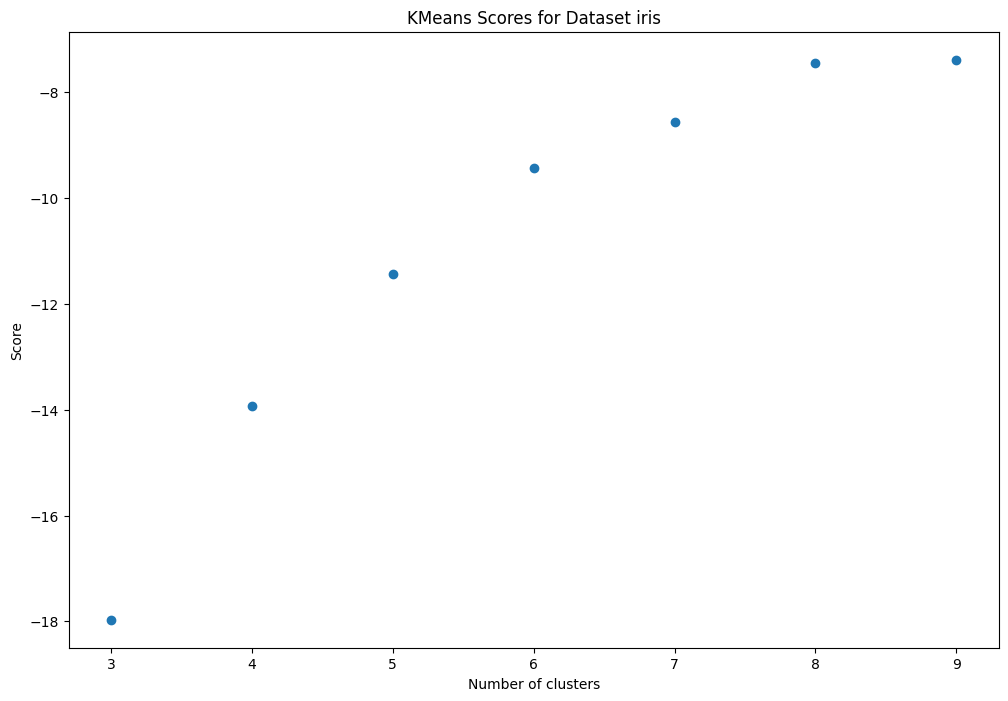

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_numbers = range(3, 10)

scores = []

for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_train)
    score = kmeans.score(X_test)
    print(f"KMeans with {n_clusters} clusters score: {score:.2f}")
    scores.append(score)

plt.figure(figsize=(12, 8))
plt.scatter(cluster_numbers, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("KMeans Scores for Dataset iris")

plt.savefig("iris.png")

plt.show()

In [9]:
from datasets import load_dataset

ds = load_dataset("ylecun/mnist", split="train")
ds = ds.train_test_split(test_size=0.2, shuffle=True)
ds

Generating test split: 100%|██████████| 10000/10000 [00:00<00:00, 703128.81 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 48000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 12000
    })
})

In [102]:
ds['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 0}

In [107]:
ds['train'][0]['image']

AttributeError: 'PngImageFile' object has no attribute 'reshape'

In [106]:
import numpy as np

X_train = [sample['image'] for sample in ds['train']]
X_test = [sample['image'] for sample in ds['test']]

# Normalize the data
X_train = X_train.reshape(len(X_train), -1).astype(float) / 255.0
X_test = X_test.reshape(len(X_test), -1).astype(float) / 255.0

X_train

AttributeError: 'list' object has no attribute 'reshape'